# 🔍 K-Nearest Neighbors (KNN) Classification — Internship Task

This notebook demonstrates **KNN classification** using the Iris dataset.  
Prepared as an **internship-quality task submission**.

---


In [1]:
# 1) Import libraries & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Features shape:", X.shape)
X.head()


Features shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# 2) Train-test split & normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# 3) Train a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



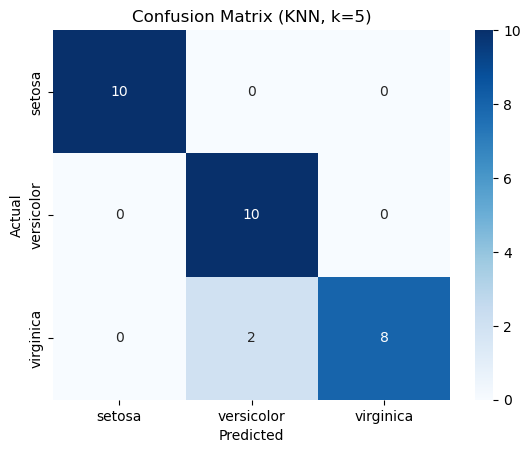

In [4]:
# 4) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN, k=5)")
plt.show()


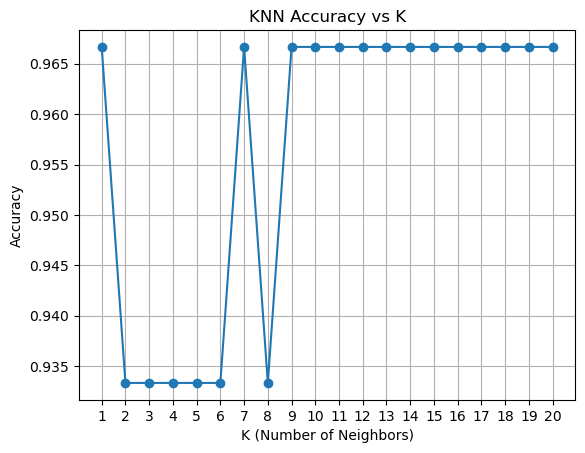

In [5]:
# 5) Accuracy vs Different K values
k_values = range(1, 21)
acc_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))

plt.plot(k_values, acc_scores, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


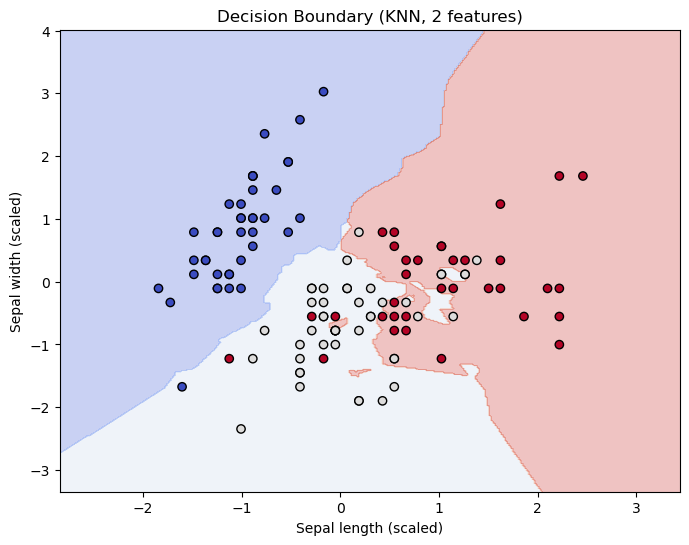

In [6]:
# 6) Decision boundary visualization (using 2 features: sepal length & sepal width)
X_2d = X.iloc[:, :2].values
y_2d = y.values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2_scaled, y_train2)

# Create meshgrid
h = 0.02
x_min, x_max = X_train2_scaled[:, 0].min() - 1, X_train2_scaled[:, 0].max() + 1
y_min, y_max = X_train2_scaled[:, 1].min() - 1, X_train2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train2_scaled[:, 0], X_train2_scaled[:, 1], c=y_train2, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.title("Decision Boundary (KNN, 2 features)")
plt.show()
